In [172]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [ ]:
def exp_taylor_series(X: float, N: int, A: float) -> float:
    n = np.array(range(N+1))
    a = (X - A)**n

    factorials = []
    for number in n:
        factorials.append(math.factorial(number))
    factorials_array = np.array(factorials)

    a = a / factorials_array

    deriv = np.empty(N+1)
    deriv.fill(np.exp(A))
    return np.dot(a, deriv)

In [256]:
class taylor_series:
    def __init__(self) -> None:
        self.graph_params = {}
        self.params = {}
        self.xs = None
        
    def set_params(self, N = 5, A = 0):
        self.params["N"] = N
        self.params["A"] = A
        return
    
    def set_graph_params(self, size = 100, lower_bound = -5, upper_bound = 5):
        self.graph_params = {
            "size": size,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }
    
    def plot_function(self, function=np.exp, taylor=exp_taylor_series):
        if not self.graph_params:
            self.set_graph_params()
        
        size = self.graph_params["size"]
        lower_bound = self.graph_params["lower_bound"]
        upper_bound = self.graph_params["upper_bound"]
        
        if self.xs is None:
            self.xs = np.sort(np.random.uniform(low=lower_bound, high=upper_bound, size=size))
            
        y = function(self.xs)
        
        taylor_ys = [taylor(x, **self.params) for x in self.xs]
        
        plt.figure(figsize=(10, 6))
        plt.plot(self.xs, y, label='Function', marker='o')
        plt.plot(self.xs, taylor_ys, label='Taylor Approximation', marker='o', color='red')
        plt.title("Plot of the Function and its Taylor Series Approximation")
        plt.xlim(lower_bound * 1.1, upper_bound * 1.1)
        plt.ylim(np.min(y) -10, np.max(y) + 10)
        plt.text(x = lower_bound, y = np.max(y)*2/3, s = f"Order = {self.params['N']}")
        plt.legend()
        plt.show()
        
    def visualize_plots(self, N=10, A = 0):
        for i in range(N+1):
            self.set_params(N=i, A = A)
            self.plot_function()
            display(plt.gcf())
            plt.close()
            time.sleep(1)
            clear_output(wait=True) 


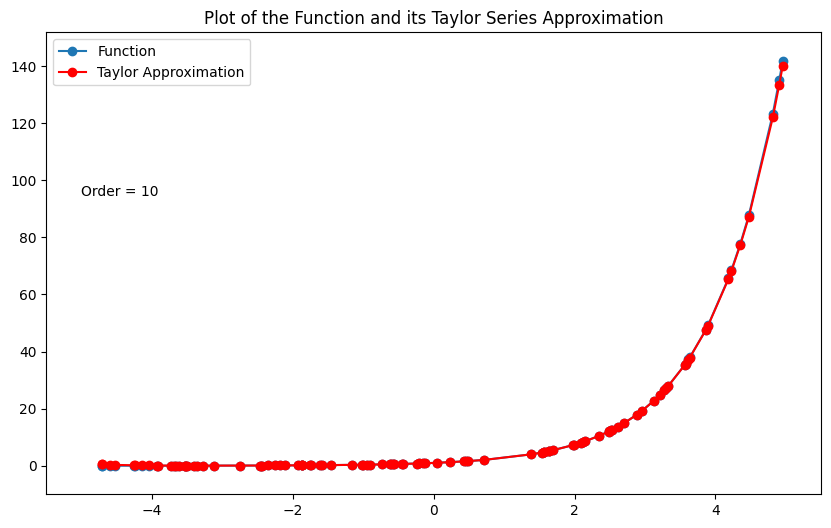

<Figure size 640x480 with 0 Axes>

In [257]:
TaylorSeries = taylor_series()
TaylorSeries.visualize_plots(N = 10)